In [1]:
!pip install opendatasets
import opendatasets as od
dataset = 'https://www.kaggle.com/datasets/denizbilginn/google-maps-restaurant-reviews'
od.download(dataset)


Skipping, found downloaded files in ".\google-maps-restaurant-reviews" (use force=True to force download)


In [2]:
import os

# Check the current directory to find where the dataset was downloaded
base_dir = './google-maps-restaurant-reviews/'  # Path to the downloaded dataset

# List the contents of the base directory
print(os.listdir(base_dir))

['dataset', 'outdoor_atmosphere_reviews.csv', 'reviews.csv', 'sepetcioglu_restaurant', 'sepetcioglu_restaurant.csv', 'taste_reviews.csv']


In [3]:
import pandas as pd

# Define the paths to the CSV files
reviews_file = os.path.join(base_dir, 'reviews.csv')

# Load the CSV files using pandas
reviews_df = pd.read_csv(reviews_file)

# Display the first few rows of the data
# print(reviews_df.head())
# print(restaurant_df.head())


# Display the headers (column names)
print("Headers of reviews.csv:")
print(reviews_df.columns)

# Optionally, display the first few rows to understand the data
print("\nFirst few rows of the CSV:")
print(reviews_df.head())



Headers of reviews.csv:
Index(['business_name', 'author_name', 'text', 'photo', 'rating',
       'rating_category'],
      dtype='object')

First few rows of the CSV:
                     business_name    author_name  \
0  Haci'nin Yeri - Yigit Lokantasi    Gulsum Akar   
1  Haci'nin Yeri - Yigit Lokantasi  Oguzhan Cetin   
2  Haci'nin Yeri - Yigit Lokantasi     Yasin Kuyu   
3  Haci'nin Yeri - Yigit Lokantasi     Orhan Kapu   
4  Haci'nin Yeri - Yigit Lokantasi     Ozgur Sati   

                                                text  \
0  We went to Marmaris with my wife for a holiday...   
1  During my holiday in Marmaris we ate here to f...   
2  Prices are very affordable. The menu in the ph...   
3  Turkey's cheapest artisan restaurant and its f...   
4  I don't know what you will look for in terms o...   

                                               photo  rating  \
0         dataset/taste/hacinin_yeri_gulsum_akar.png       5   
1        dataset/menu/hacinin_yeri_oguzhan_cetin.

In [4]:
import pandas as pd
import os

# Define the paths to the CSV files
reviews_file = os.path.join(base_dir, 'reviews.csv')

# Load the CSV file using pandas
reviews_df = pd.read_csv(reviews_file)

# Filter the dataset for rows where 'rating_category' is 'outdoor_atmosphere'
taste_df = reviews_df[reviews_df['rating_category'] == 'taste']

# Display the first few rows of the filtered dataset
print("Filtered Data (outdoor_atmosphere):")
print(taste_df.head())

# Optionally, save the filtered data to a new CSV file
taste_file = os.path.join(base_dir, 'taste_reviews.csv')
taste_df.to_csv(taste_file, index=False)
print(f"Filtered dataset saved to {taste_file}")

# Display the headers (column names)
print("Headers of reviews.csv:")
print(taste_df.columns)

# Optionally, display the first few rows to understand the data
print("\nFirst few rows of the CSV:")
print(reviews_df.head())


Filtered Data (outdoor_atmosphere):
                      business_name   author_name  \
0   Haci'nin Yeri - Yigit Lokantasi   Gulsum Akar   
6   Haci'nin Yeri - Yigit Lokantasi     İrem Eren   
7   Haci'nin Yeri - Yigit Lokantasi   Nadia Salim   
10  Haci'nin Yeri - Yigit Lokantasi   Onur Celebi   
12                     Pizza Fellas  Serkan Colak   

                                                 text  \
0   We went to Marmaris with my wife for a holiday...   
6   What you see is 125 TL in total. It's a pretty...   
7   Delicious food at rock bottom prices. Friendly...   
10  The food was just like the ones my mother made...   
12  Flavor : It has nothing but dough taste. Labor...   

                                          photo  rating rating_category  
0    dataset/taste/hacinin_yeri_gulsum_akar.png       5           taste  
6      dataset/taste/hacinin_yeri_irem_eren.png       5           taste  
7    dataset/taste/hacinin_yeri_nadia_salim.png       5           taste  
10   d

In [6]:
! pip install tf-keras
import pandas as pd
from transformers import pipeline

# Initialize the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to classify sentiment as Negative, Neutral, or Positive and map them to numerical values
def classify_sentiment(text):
    sentiment = sentiment_analyzer(text)[0]['label']  # Get the sentiment label
    if sentiment == 'NEGATIVE':
        return 0  # Neutral -> 1
    elif sentiment == 'NEUTRAL' :
        return 0  # Positive -> 2
    else:
        return 1  # Positive -> 2

# Apply the sentiment analysis to the 'text' column and map sentiments to numerical values
taste_df['sentiment_encoded'] = taste_df['text'].apply(classify_sentiment)

# Function to map ratings 1-5 to 0, 1, 2 based on the provided scale
def map_rating(rating):
    if rating in [1, 2, 3]:
        return 0  # Ratings 1, 2 -> 0
    else:
        return 1 # Ratings 4, 5 -> 2

# Apply the rating conversion to the 'rating' column
taste_df['rating_encoded'] = taste_df['rating'].apply(map_rating)

# Show the dataframe with the encoded sentiment and rating columns
print(taste_df[['business_name', 'author_name', 'text', 'sentiment_encoded', 'rating_encoded']].head())


C:\Users\Shayan\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                      business_name   author_name  \
0   Haci'nin Yeri - Yigit Lokantasi   Gulsum Akar   
6   Haci'nin Yeri - Yigit Lokantasi     İrem Eren   
7   Haci'nin Yeri - Yigit Lokantasi   Nadia Salim   
10  Haci'nin Yeri - Yigit Lokantasi   Onur Celebi   
12                     Pizza Fellas  Serkan Colak   

                                                 text  sentiment_encoded  \
0   We went to Marmaris with my wife for a holiday...                  0   
6   What you see is 125 TL in total. It's a pretty...                  1   
7   Delicious food at rock bottom prices. Friendly...                  1   
10  The food was just like the ones my mother made...                  1   
12  Flavor : It has nothing but dough taste. Labor...                  0   

    rating_encoded  
0                1  
6                1  
7                1  
10               1  
12               0  


C:\Users\Shayan\AppData\Local\Temp/ipykernel_24868/195376559.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taste_df['sentiment_encoded'] = taste_df['text'].apply(classify_sentiment)
C:\Users\Shayan\AppData\Local\Temp/ipykernel_24868/195376559.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taste_df['rating_encoded'] = taste_df['rating'].apply(map_rating)


Correlation between sentiment and rating: 0.57


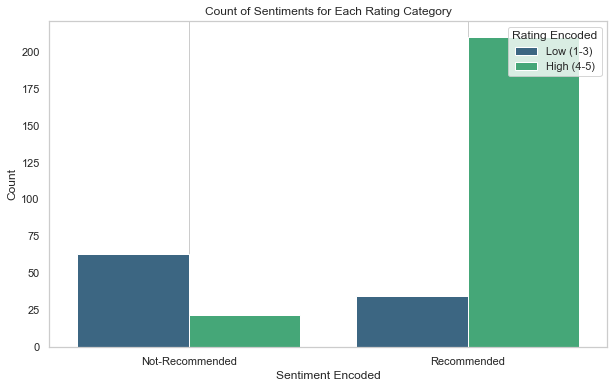

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your reviews CSV file

# Assuming the sentiment_encoded and rating_encoded columns are already present
# Calculate the correlation between sentiment_encoded and rating_encoded
correlation = taste_df['sentiment_encoded'].corr(taste_df['rating_encoded'])
print(f"Correlation between sentiment and rating: {correlation:.2f}")

# Set the visual style of the plots
sns.set(style='whitegrid')


# Create a bar plot to show the counts of each category
plt.figure(figsize=(10, 6))
sns.countplot(data=taste_df, x='sentiment_encoded', hue='rating_encoded', palette='viridis')
plt.title('Count of Sentiments for Each Rating Category')
plt.xlabel('Sentiment Encoded')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not-Recommended', 'Recommended'])
plt.legend(title='Rating Encoded', loc='upper right', labels=['Low (1-3)', 'High (4-5)'])
plt.grid()
plt.show()


In [8]:
import os
from PIL import Image

# Specify the base directory where the dataset is located
base_dir = './google-maps-restaurant-reviews/dataset/dataset/taste/'  # Path to the downloaded dataset
target_size = (224, 224)  # Desired size for all images (224x224)

# Loop through all subdirectories and files
for root, dirs, files in os.walk(base_dir):
    print(f"Processing folder: {root}")
    for filename in files:
        # Only process image files with specific extensions
        if filename.lower().endswith(('.png')):
            file_path = os.path.join(root, filename)
            try:
                with Image.open(file_path) as img:
                    # Resize the image to the target size (224, 224)
                    img_resized = img.resize(target_size)
                    # If the image is not in RGB mode, convert it to RGB
                    if img_resized.mode != 'RGB':
                        img_resized = img_resized.convert('RGB')
                    # Save the resized image back (overwrite original)
                    img_resized.save(file_path)  # Overwrites the original image
                    print(f'Resized and saved: {filename} to {target_size}')
            except Exception as e:
                print(f"Error processing {filename}: {e}")


Processing folder: ./google-maps-restaurant-reviews/dataset/dataset/taste/
Resized and saved: abidin_tantuni_ali_simsek.png to (224, 224)
Resized and saved: abidin_tantuni_meltem_ovali.png to (224, 224)
Resized and saved: abidin_tantuni_ugurcan_arbaz.png to (224, 224)
Resized and saved: ahsap_iskender_ersin_kocabaldir.png to (224, 224)
Resized and saved: ahsap_iskender_faruk_colak.png to (224, 224)
Resized and saved: ahsap_iskender_sena_akim.png to (224, 224)
Resized and saved: akpinar_restaurant_ertan_yilmaz.png to (224, 224)
Resized and saved: akpinar_restaurant_gulcan_kaya.png to (224, 224)
Resized and saved: akpinar_restaurant_tugce_ozkan.png to (224, 224)
Resized and saved: alavara_ece_ocak.png to (224, 224)
Resized and saved: alavara_sevgi_siner.png to (224, 224)
Resized and saved: alsancak_firin_cenker_goncu.png to (224, 224)
Resized and saved: alsancak_firin_elif_gursoy.png to (224, 224)
Resized and saved: alsancak_firin_murat_turan.png to (224, 224)
Resized and saved: antakya_

Resized and saved: karakoy_lokantasi_ece_oztunc.png to (224, 224)
Resized and saved: kasikla_restaurant_arda_kacan.png to (224, 224)
Resized and saved: kasikla_restaurant_edip_ipek.png to (224, 224)
Resized and saved: kasikla_restaurant_gokhan_kement.png to (224, 224)
Resized and saved: kasikla_restaurant_sena_arpacioglu.png to (224, 224)
Resized and saved: kebabci_halil_usta_ali_okan.png to (224, 224)
Resized and saved: kebabci_halil_usta_omer_zade.png to (224, 224)
Resized and saved: kebabci_halil_usta_sabri_donmez.png to (224, 224)
Resized and saved: kebabci_halil_usta_sayan_badem.png to (224, 224)
Resized and saved: kebabci_mahmut_ahmet_yildirim.png to (224, 224)
Resized and saved: kebabci_mahmut_ali_selcik.png to (224, 224)
Resized and saved: kebabci_mahmut_mahmut_terim.png to (224, 224)
Resized and saved: kebabci_mahmut_okan_hosten.png to (224, 224)
Resized and saved: kfc_fatma_zullu.png to (224, 224)
Resized and saved: kfc_pinar_atici.png to (224, 224)
Resized and saved: kfc_res

Resized and saved: salih_usta_fikret_aslan.png to (224, 224)
Resized and saved: salih_usta_hasan_erdem.png to (224, 224)
Resized and saved: salih_usta_mehmet_gemici.png to (224, 224)
Resized and saved: salih_usta_yilmaz_yasar.png to (224, 224)
Resized and saved: sanukiya_arthur_jonathan.png to (224, 224)
Resized and saved: sanukiya_ashles_hsu.png to (224, 224)
Resized and saved: sanukiya_michael_lam.png to (224, 224)
Resized and saved: sardalye_efecan_kobo.png to (224, 224)
Resized and saved: sardalye_guney_gecer.png to (224, 224)
Resized and saved: sardalye_irmak_yuzbasioglu.png to (224, 224)
Resized and saved: say_cheese_batuhan_demirci.png to (224, 224)
Resized and saved: say_cheese_emre_gudul.png to (224, 224)
Resized and saved: say_cheese_nur_yoruk.png to (224, 224)
Resized and saved: say_cheese_saniye_atga.png to (224, 224)
Resized and saved: sema_gozleme_holden_lai.png to (224, 224)
Resized and saved: sema_gozleme_melike_selvi.png to (224, 224)
Resized and saved: sema_gozleme_ug

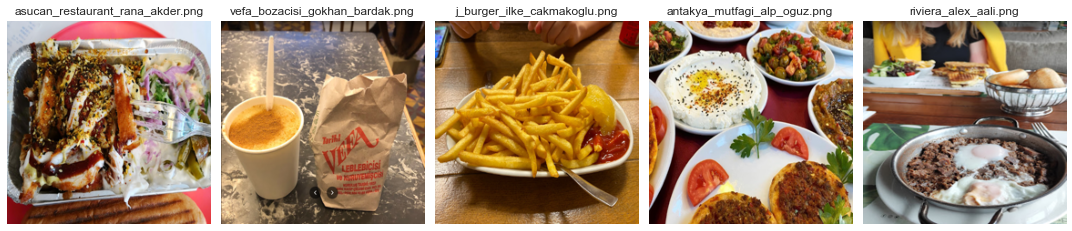

In [9]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Specify the base directory where the dataset is located
base_dir = './google-maps-restaurant-reviews/dataset/dataset/taste/'  # Path to the downloaded dataset

# Create a list to hold image paths
image_paths = []

# Loop through all subdirectories and files to collect image paths
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.lower().endswith(('.png')):
            image_paths.append(os.path.join(root, filename))

# Randomly select a few images to display
num_images_to_display = 5  # Specify how many images to display
selected_images = random.sample(image_paths, num_images_to_display)

# Plot the selected images
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(selected_images):
    img = Image.open(img_path)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(os.path.basename(img_path))  # Show the filename as the title
plt.tight_layout()
plt.show()


In [10]:
!pip install tensorflow numpy pandas matplotlib
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_dir = './google-maps-restaurant-reviews/dataset/dataset/taste/'


# Add the full path for each image
taste_df['image_path'] = taste_df['photo'].apply(lambda x: os.path.join(base_dir, os.path.basename(x)))

# Display the first few rows to check
print(taste_df.head())


                      business_name   author_name  \
0   Haci'nin Yeri - Yigit Lokantasi   Gulsum Akar   
6   Haci'nin Yeri - Yigit Lokantasi     İrem Eren   
7   Haci'nin Yeri - Yigit Lokantasi   Nadia Salim   
10  Haci'nin Yeri - Yigit Lokantasi   Onur Celebi   
12                     Pizza Fellas  Serkan Colak   

                                                 text  \
0   We went to Marmaris with my wife for a holiday...   
6   What you see is 125 TL in total. It's a pretty...   
7   Delicious food at rock bottom prices. Friendly...   
10  The food was just like the ones my mother made...   
12  Flavor : It has nothing but dough taste. Labor...   

                                          photo  rating rating_category  \
0    dataset/taste/hacinin_yeri_gulsum_akar.png       5           taste   
6      dataset/taste/hacinin_yeri_irem_eren.png       5           taste   
7    dataset/taste/hacinin_yeri_nadia_salim.png       5           taste   
10   dataset/taste/hacinin_yeri_onur_c

C:\Users\Shayan\AppData\Local\Temp/ipykernel_24868/3822844868.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taste_df['image_path'] = taste_df['photo'].apply(lambda x: os.path.join(base_dir, os.path.basename(x)))


In [11]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

taste_df['sentiment_encoded'] = taste_df['sentiment_encoded'].astype(str)

# Flow from dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=taste_df,
    x_col='image_path',
    y_col='sentiment_encoded',  # Replace with the column name where sentiment is encoded (0 or 1)
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Since we have two classes (0 or 1)
    subset='training'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=taste_df,
    x_col='image_path',
    y_col='sentiment_encoded',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 264 validated image filenames belonging to 2 classes.
Found 66 validated image filenames belonging to 2 classes.


C:\Users\Shayan\AppData\Local\Temp/ipykernel_24868/243267942.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taste_df['sentiment_encoded'] = taste_df['sentiment_encoded'].astype(str)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()

# Convolutional layers (VGG-like structure)
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # To prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification (0 or 1)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\Shayan\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,425,857 (77.92 MB)

 Trainable params: 20,425,857 (77.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=15  # Adjust the number of epochs as needed
)


C:\Users\Shayan\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6882 - loss: 1.2868 - val_accuracy: 0.7031 - val_loss: 0.6378
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7812 - loss: 0.5162 - val_accuracy: 0.5000 - val_loss: 0.9013
Epoch 3/15


C:\Users\Shayan\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7783 - loss: 0.5624 - val_accuracy: 0.7031 - val_loss: 0.6427
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7812 - loss: 0.6192 - val_accuracy: 0.5000 - val_loss: 0.7117
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7432 - loss: 0.6183 - val_accuracy: 0.6875 - val_loss: 0.6425
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7188 - loss: 0.5774 - val_accuracy: 1.0000 - val_loss: 0.2470
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8134 - loss: 0.5131 - val_accuracy: 0.7031 - val_loss: 0.6093
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7188 - loss: 0.5886 - val_accuracy: 0.5000 - val_loss: 0.7476
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7783 - loss: 0.5751 - val_accuracy: 0.6875 - val_loss: 0.6257
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6875 - loss: 0.6274 - val_accuracy: 1.0000 - val_loss: 0.4164
Epoch 11/15
8/8 ━━

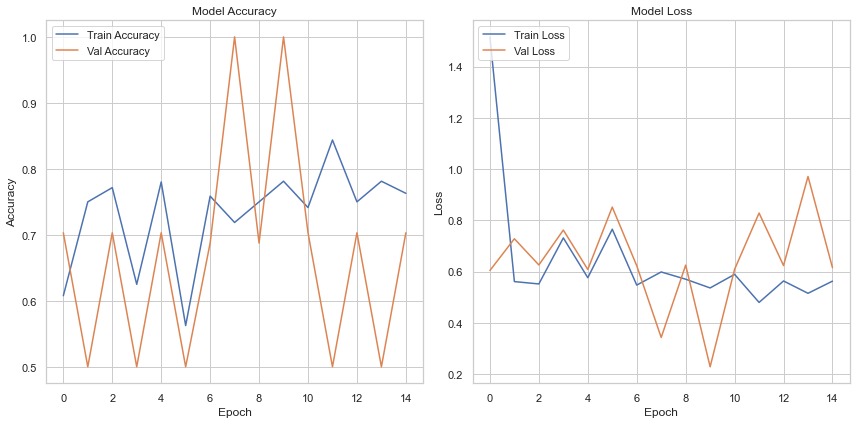

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
